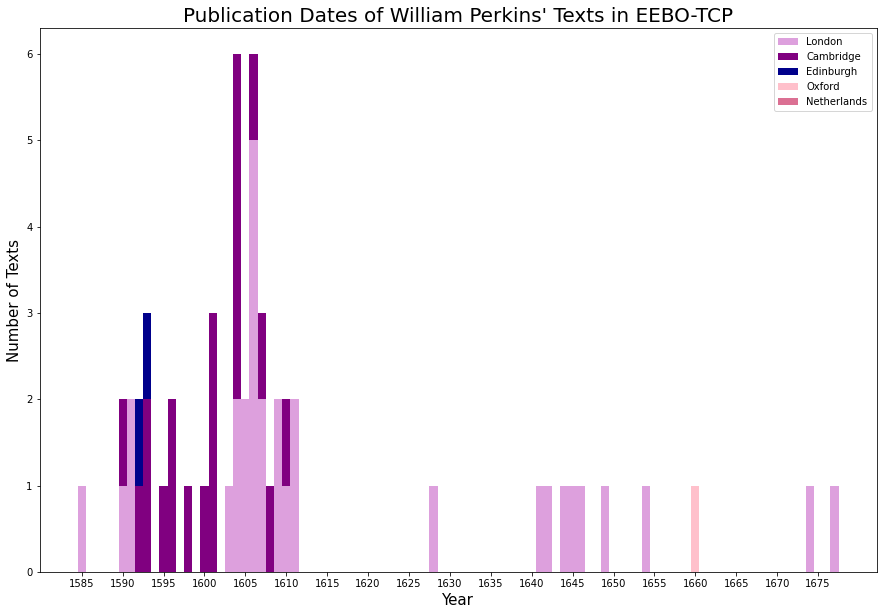

In [26]:
import pandas as pd 
import re 
import matplotlib.pyplot as plt
perkins = pd.read_csv('perkinsTCP.csv')
ids = perkins['id']
freqs = {}

for index,ID in enumerate(ids):

    pubplace = perkins['pubplace'][index]
    if re.search('london|londini|llundain|lo ndon|londn|londres',pubplace.lower()):
        pubplace = 'London'
    elif re.search('cambridge|cantabrigiæ',pubplace.lower()):
        pubplace = 'Cambridge'
    elif re.search('edinburgh',pubplace.lower()):
        pubplace = 'Edinburgh'
    elif re.search('oxford',pubplace.lower()):
        pubplace = 'Oxford'
    elif re.search('delph|amsterdam',pubplace.lower()): 
        pubplace = 'Netherlands'

    date = perkins['date'][index]
    if '-' in str(date):
        d = date.split('-')
        date = d[0]
    if int(date) not in freqs.keys():
        freqs[int(date)] = {'London':0,'Cambridge':0,'Edinburgh':0,'Oxford':0,'Netherlands':0}
    freqs[int(date)][pubplace] += 1 
df = pd.DataFrame(columns = ['Year','London','Cambridge','Edinburgh','Oxford','Netherlands'])

finalFreqs = {}
for year in range(min(freqs.keys()),max(freqs.keys())+1):
    if year in freqs.keys(): finalFreqs[year] = freqs[year]
    else: finalFreqs[year] = {'London':0,'Cambridge':0,'Edinburgh':0,'Oxford':0,'Netherlands':0}

for year in sorted(finalFreqs.keys()):
    infodict = finalFreqs[year]
    yeardf = pd.DataFrame([{'Year':year,
                'London':infodict['London'],
                'Cambridge':infodict['Cambridge'],
                'Edinburgh':infodict['Edinburgh'],
                'Oxford':infodict['Oxford'],
                'Netherlands':infodict['Netherlands']}])
    df = pd.concat([df,yeardf],ignore_index = True)

width = 1     
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(df['Year'], df['London'], width, label='London',color='plum')
ax.bar(df['Year'], df['Cambridge'], width, label='Cambridge',bottom = df['London'],color='purple')
ax.bar(df['Year'], df['Edinburgh'], width, label='Edinburgh',bottom = df['Cambridge'],color='darkblue')
ax.bar(df['Year'], df['Oxford'], width, label='Oxford',bottom = df['Edinburgh'],color='pink')
ax.bar(df['Year'], df['Netherlands'], width, label='Netherlands',bottom=df['Oxford'],color='palevioletred')


ax.set_xticks(range(min(df['Year']), max(df['Year']+1), 5))
ax.set_yticks(range(0,7))
ax.set_ylabel('Number of Texts',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.set_title("Publication Dates of William Perkins' Texts in EEBO-TCP",fontsize=20)
ax.legend()

plt.show()
# bar(finalFreqs.keys(),finalFreqs.values(),"Publication of William Perkins' Texts Over Time",'pink','Year','Number of Texts')